## Lecture 01/29/2025
### PDEs and Boundary Value Problems: Numerical Stability

#### Stability Analysis
- FTCS (forward time (EF), centered spatial differences) is inherently unstable for the wave equation
- Implicit methods rely on matrix inversion / linear algebra
- Solution set gives solution at $t=t+h$
- Von Neumann analysis: calculating eigenvalues of the inverse evolution matrix
- Implicit method is always less than one and is unconditionally stable (but won't necessarily converge to the correct result

#### Crank-Nicolson Method 
CN method takes the average of the two methods we have covered so far: it acts as a hybrid between FTCS and implicit methods

$=>$ need to solve a matrix at each timestep (as well as eigenvalues for stability analysis), similar to implicit method; for the wave equation, the eigenvalues have a magnitude of unity and therefore the solution is neither amplified or suppressed.

Crank-Nicolson method relies on inverting a tri-diagonal matrix at each timestep

#### Finite Element Methods

Alternatives to finite differencing: finite volume (coordinate-based subdivisions) analysis, finite element (unstructured coordinate-free mesh) analysis, both exhibiting mesh refinement

#### Mesh Refinement

Adaptive mesh refinement can allow models to capture more physics (e.g., turbulence, eddy formation, etc) in contrast to a statically-refined mesh

Randomly mentioned Courant criteria without naming it

#### Spectral Methods

- designed for systes with smooth solutions, better accuracy than finite differences
- gives trial solution for PDE:
  $$ \partial_t^2 \phi = \nu^2 \partial_x^2 \phi $$
- Trial solution given by:
  $$ \phi_k (x,t) = \sin{\left( \frac{\pi k x}{L} \right)} e^{ikx} $$
such that the trial solution satisfies the boundary conditions (fixed at zero) for any wavenumber $k$
- Now: divide the domain into $N$ intervals with positions: $x_n = \frac{nL}{N}$
- The solution at these points is then given (see lecture slides)
- THe real part of the solution at $t=0$:
$$ \phi(x_n,0) = \frac{1}{N} \sum_{k=1}^{N-1} \alpha_k \sin{\left(\frac{\pi k n}{N} \right ) }$$
The solution is given (for all $k$):
$$ \phi(x_n ,t) = \frac{1}{N} \sum_{k=1}^{N-1} \left [ \alpha \cos{\left(\frac{\pi \nu k t}{L} \right ) } + \eta_k \quad ... \right ]$$ (see lecture slides)

Then, an inverse Fourier transform will yield the solution in the spatial coordinate.

## Random Processes

#### Introduction
- Random processes: radioactive decay, quantum state transitions
- nonuniform processes modeled as random: Brownian motion (could in principle calculate all motion, but it is modeled as a random process for tractibility and scalability)

### Random Number Generators
- Most basic RNG starts with an integer (i.e., a seed) and generates numbers from it.
#### Linear Congruential RNG
- For example, a mapping takes some number $x$ and returns another $x'$ is called a linear congruential RNG:
$$ x' = (a x + c) \mod{m} \qquad \qquad \mathrm{for}\quad a,c,m \in \mathbf{Z}$$
- values are carefully chosen:
- $c$ is prime and has only 3 factors
- $m$ is max ($2^32$) for
#### Mersenne Twister
- computationally cheap / easy
- default RNG in numpy.random.random()
- returns scalar between 0 and 1, return as a scalar


#### In - class example: Decay of an Isotope
- decay of thallium into lead, using 08_decay0.py:

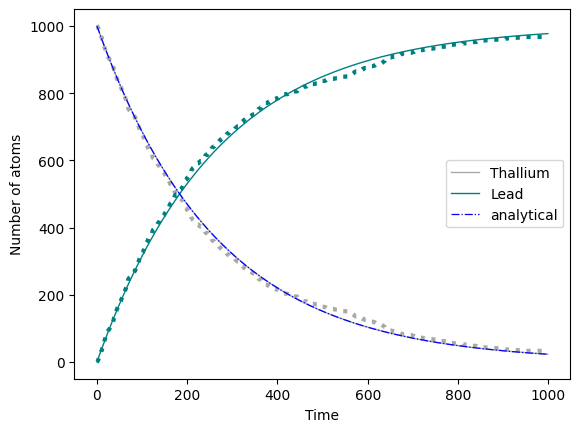

In [30]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

# Constants
NTl0 = 1000            # Number of thallium atoms
NTl = NTl0
NPb = 0               # Number of lead atoms
tau = 183.2           # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

NTl_rand = NTl0
NPb_rand = 0

# Lists of plot points
tpoints = np.arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []
Tlpoints_rand = []
Pbpoints_rand = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Tlpoints_rand.append(NTl_rand)
    Pbpoints_rand.append(NPb_rand)

    # Complete in-class
    # Calculate the number of atoms that decay in this timestep
    new_lead = p * NTl
    NPb += new_lead
    NTl -= new_lead

    rand = random(NTl_rand)

    ndecays = (rand < p).sum()
    NTl_rand -= ndecays
    NPb_rand += ndecays
    
    

twos = 2* np.ones_like(tpoints)
analytical_sol = NTl0 * (twos ** (-tpoints/tau))
# Make the graph
plt.plot(tpoints,Tlpoints, label='Thallium',color='darkgray', lw=1)
plt.plot(tpoints,Pbpoints,label='Lead',color='teal', lw=1)

plt.plot(tpoints,Tlpoints_rand,color='darkgray', lw=3, linestyle=':')
plt.plot(tpoints,Pbpoints_rand,color='teal', lw=3, linestyle=':')

plt.plot(tpoints,analytical_sol, label='analytical', color='b', linestyle='-.', lw=0.9)

plt.xlabel("Time")
plt.ylabel("Number of atoms")
plt.legend()
plt.show()
